##### Data Preprocessing

 #### Step 1: Import Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load the dataset
data = pd.read_csv('Dataset.csv')

#### Step 2: Basic Information About the Dataset

In [21]:
data.head()

,Customer ID,Gender,Customer Type,Age,Type of Travel,Class,Arrival Service,Booking Services,Immediate Transfer,Lounge Service,...,Boarding Service,Layover Service,Onboard Services,Baggage Service,Immigration Security,Call Center Service,Departure Delay,Arrival Delay,Total Delay,Satisfaction
0,29431,Female,Loyal Customer,59,Business travel,Business,4,2,2,1,...,2,5,2,5,5,3,0,0.0,0.0,Satisfied
1,89591,Female,Loyal Customer,46,Business travel,Business,5,1,3,3,...,1,3,3,5,4,1,23,3.0,26.0,Satisfied
2,67145,Male,Loyal Customer,45,Business travel,Eco,3,1,1,4,...,3,3,3,5,2,5,0,0.0,0.0,Satisfied
3,112858,Female,Loyal Customer,40,Business travel,Business,5,1,2,5,...,4,2,2,4,5,5,0,0.0,0.0,Satisfied
4,72843,Male,Loyal Customer,54,Business travel,Business,5,3,1,5,...,4,5,1,2,5,2,0,0.0,0.0,Satisfied


In [22]:
# View shape and columns
print("Shape of the dataset:", data.shape)
print("\nColumns in the dataset:\n", data.columns.tolist())

# View data types
print("\nData types of each column:\n")
print(data.info())


Shape of the dataset: (20000, 21)

Columns in the dataset:
 ['Customer ID', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Arrival Service', 'Booking Services', 'Immediate Transfer', 'Lounge Service', 'Check-in Service', 'Boarding Service', 'Layover Service', 'Onboard Services', 'Baggage Service', 'Immigration Security', 'Call Center Service', 'Departure Delay', 'Arrival Delay', 'Total Delay', 'Satisfaction']

Data types of each column:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer ID           20000 non-null  int64  
 1   Gender                20000 non-null  object 
 2   Customer Type         20000 non-null  object 
 3   Age                   20000 non-null  int64  
 4   Type of Travel        20000 non-null  object 
 5   Class                 20000 non-null  object 
 6   Arrival Service      

In [23]:
data['Satisfaction'].value_counts()

Satisfaction
Satisfied       14995
DisSatisfied     5005
Name: count, dtype: int64

In [24]:
data['Satisfaction'].value_counts()

Satisfaction
Satisfied       14995
DisSatisfied     5005
Name: count, dtype: int64

#### Step 3: Descriptive Statistics

In [25]:
# Summary stats for numerical columns
print("Numerical Summary:")
print(data.describe().T)

Numerical Summary:
                        count          mean           std  min      25%  \
Customer ID           20000.0  65392.551900  37479.568414  2.0  32945.5   
Age                   20000.0     40.790500     13.862226  7.0     30.0   
Arrival Service       20000.0      2.995300      1.420978  1.0      2.0   
Booking Services      20000.0      3.026000      1.414434  1.0      2.0   
Immediate Transfer    20000.0      3.001350      1.415679  1.0      2.0   
Lounge Service        20000.0      3.000100      1.413400  1.0      2.0   
Check-in Service      20000.0      2.989100      1.422035  1.0      2.0   
Boarding Service      20000.0      3.024450      1.413737  1.0      2.0   
Layover Service       20000.0      2.989700      1.416049  1.0      2.0   
Onboard Services      20000.0      3.006950      1.411418  1.0      2.0   
Baggage Service       20000.0      2.983500      1.414047  1.0      2.0   
Immigration Security  20000.0      3.004950      1.413480  1.0      2.0   
Call C

In [26]:
# Summary for categorical/object columns
print("\nCategorical Summary:\n")
print(data.describe(include='object').T)


Categorical Summary:

                count unique              top   freq
Gender          20000      2           Female  10047
Customer Type   20000      2   Loyal Customer  17302
Type of Travel  20000      2  Business travel  16453
Class           20000      3         Business  12805
Satisfaction    20000      2        Satisfied  14995


#### Step 4: Check for Missing Values

In [27]:
# Count missing values
print("\nMissing Values in Each Column:\n")
print(data.isnull().sum())



Missing Values in Each Column:

Customer ID             0
Gender                  0
Customer Type           0
Age                     0
Type of Travel          0
Class                   0
Arrival Service         0
Booking Services        0
Immediate Transfer      0
Lounge Service          0
Check-in Service        0
Boarding Service        0
Layover Service         0
Onboard Services        0
Baggage Service         0
Immigration Security    0
Call Center Service     0
Departure Delay         0
Arrival Delay           0
Total Delay             0
Satisfaction            0
dtype: int64


In [28]:
### Fill Missing Arrival Delay with Median
import warnings
warnings.filterwarnings('ignore')
# Step 1: Calculate the median of the column
arrival_delay_median = data['Arrival Delay'].median()

# Step 2: Fill missing values with median
data['Arrival Delay'].fillna(arrival_delay_median, inplace=True)

# Step 3: Confirm that there are no more missing values
print("Missing values in 'Arrival Delay' after filling:", data['Arrival Delay'].isnull().sum())

Missing values in 'Arrival Delay' after filling: 0


#### Step 5: Check and Handle Duplicate Rows

In [29]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicate rows dropped.")


Number of duplicate rows: 0


#### Step 6: Explore Categorical Features

In [30]:
# Define list of categorical columns (you can add more if needed)
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

# View value counts for each
for col in categorical_columns:
    print(f"\nValue Counts for '{col}':")
    print(data[col].value_counts())



Value Counts for 'Gender':
Gender
Female    10047
Male       9953
Name: count, dtype: int64

Value Counts for 'Customer Type':
Customer Type
Loyal Customer       17302
disloyal Customer     2698
Name: count, dtype: int64

Value Counts for 'Type of Travel':
Type of Travel
Business travel    16453
Personal Travel     3547
Name: count, dtype: int64

Value Counts for 'Class':
Class
Business    12805
Eco          6110
Leisure      1085
Name: count, dtype: int64

Value Counts for 'Satisfaction':
Satisfaction
Satisfied       14995
DisSatisfied     5005
Name: count, dtype: int64


In [31]:
# Set a random seed for reproducibility (optional)
np.random.seed(42)

# Replace with random integers between 0 and 100
data['Departure Delay'] = np.random.randint(0, 131, size=len(data))
data['Arrival Delay'] = np.random.randint(0, 101, size=len(data))

# Confirm the changes
print(data[['Departure Delay', 'Arrival Delay']].head())


   Departure Delay  Arrival Delay
0              102             51
1               92             95
2               14             98
3              106             95
4               71             33


#### Step 7: Explore Distributions of Numerical Features

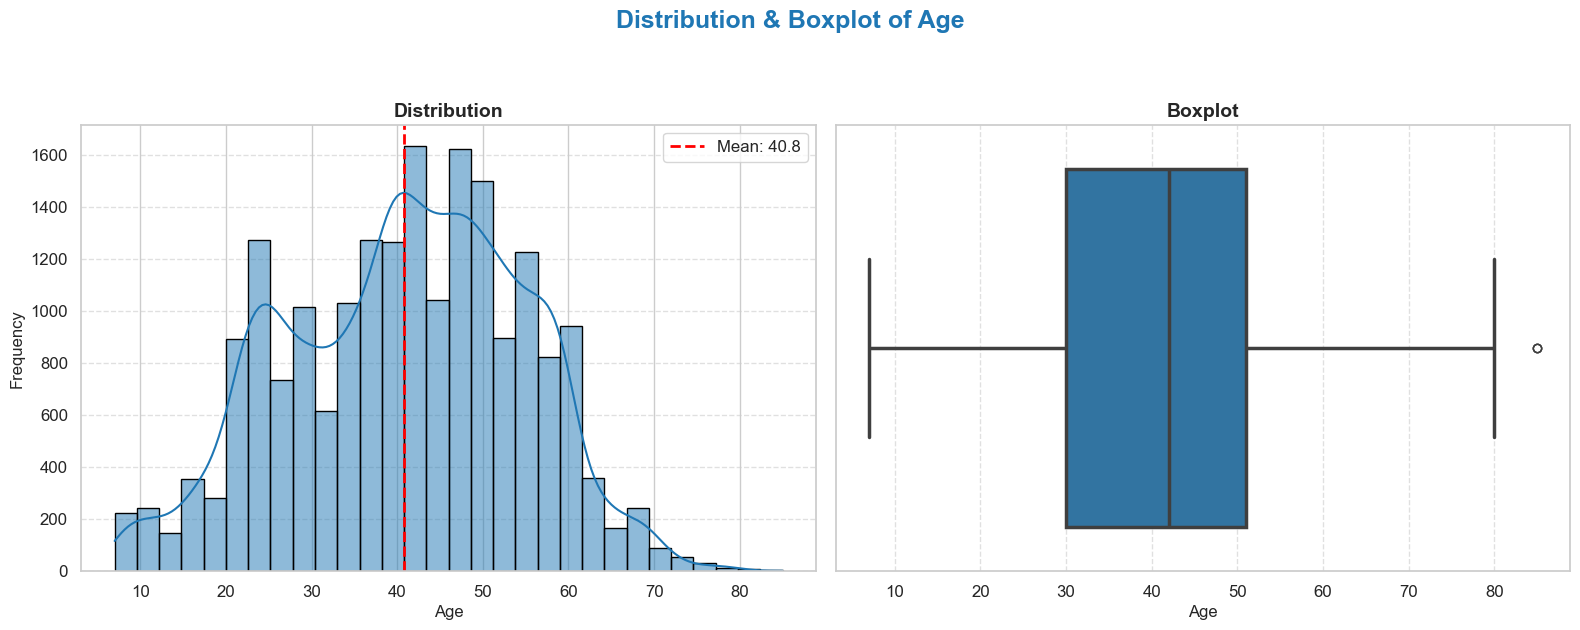

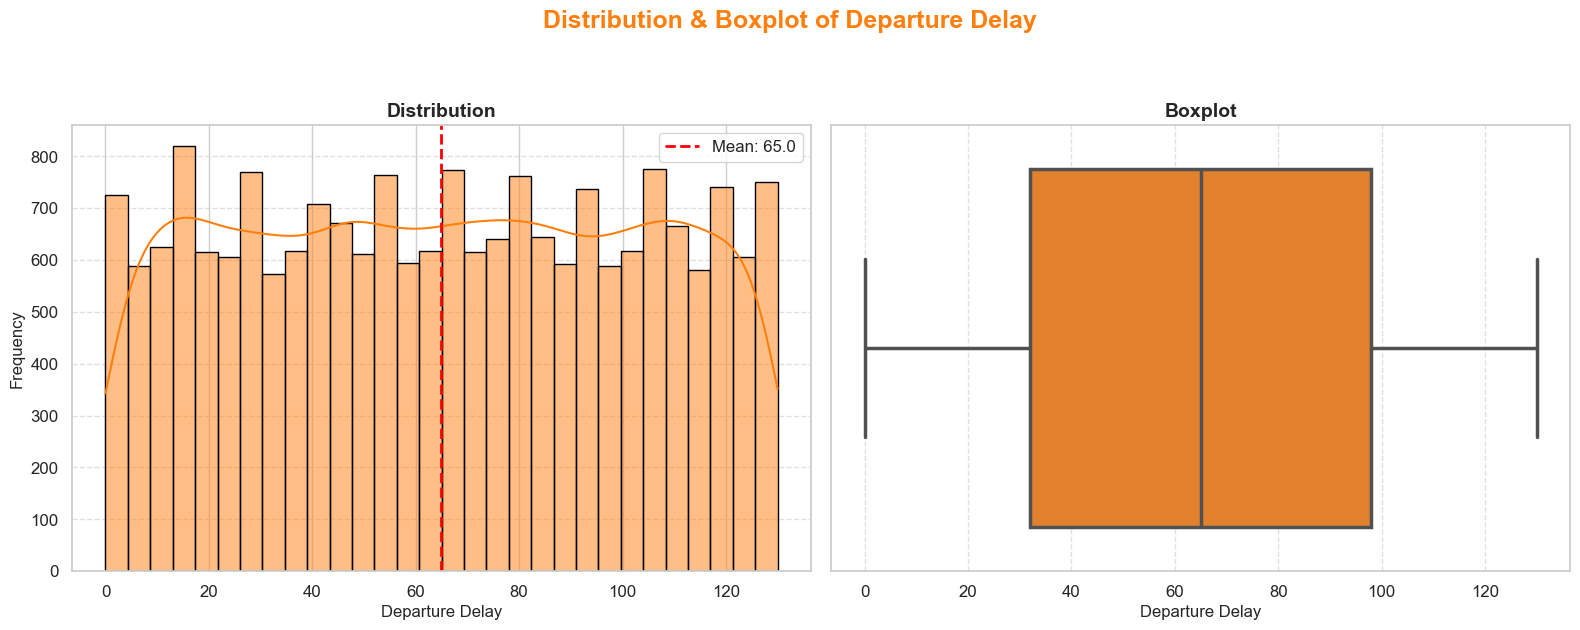

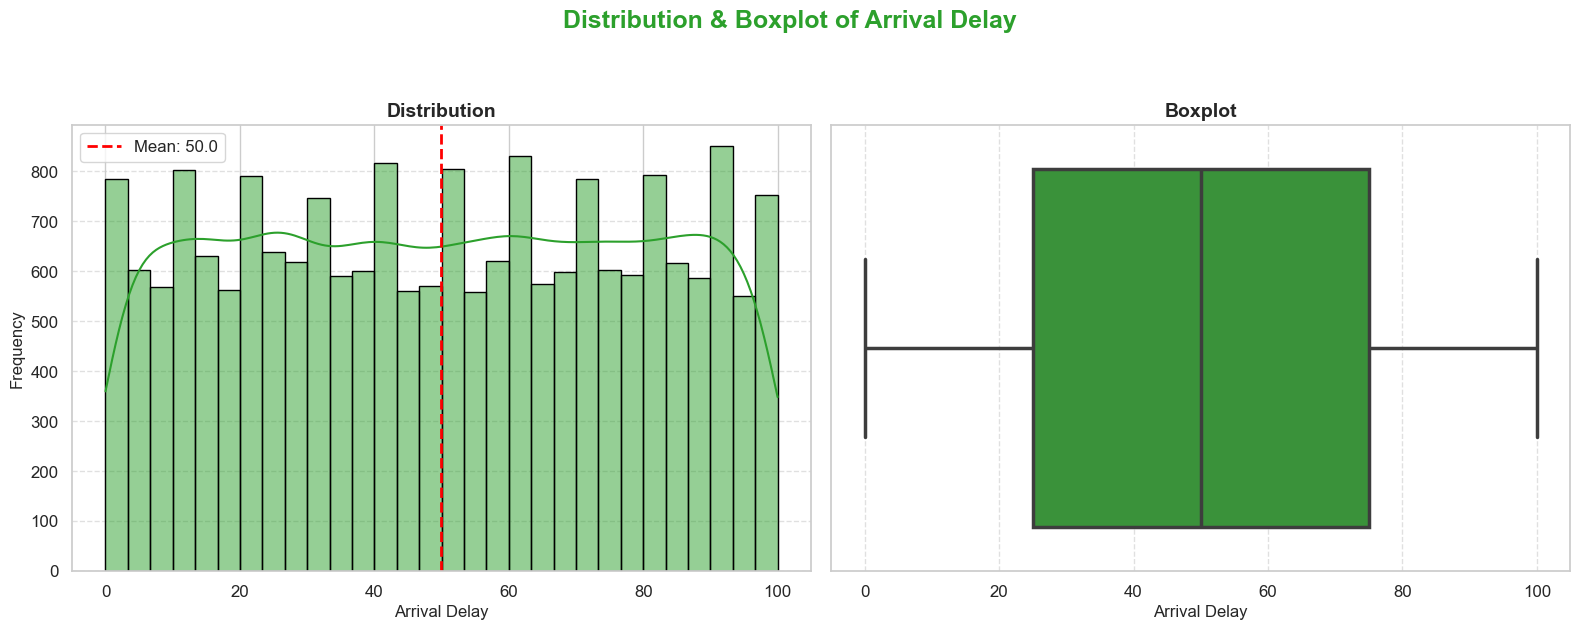

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent and attractive style
sns.set(style="whitegrid", font_scale=1.1)

# Numerical columns and custom color palette
numerical_columns = ['Age', 'Departure Delay', 'Arrival Delay']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create subplots for each numerical column
for i, col in enumerate(numerical_columns):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f"Distribution & Boxplot of {col}", fontsize=18, weight='bold', color=colors[i], y=1.05)

    # --- Histogram with KDE ---
    sns.histplot(data[col], kde=True, bins=30, color=colors[i], edgecolor='black', ax=axs[0])
    axs[0].axvline(data[col].mean(), color='red', linestyle='--', linewidth=2,
                   label=f"Mean: {data[col].mean():.1f}")
    axs[0].set_title("Distribution", fontsize=14, weight='bold')
    axs[0].set_xlabel(col, fontsize=12)
    axs[0].set_ylabel("Frequency", fontsize=12)
    axs[0].legend()
    axs[0].grid(axis='y', linestyle='--', alpha=0.6)

    # --- Boxplot ---
    sns.boxplot(x=data[col], color=colors[i], linewidth=2.5, ax=axs[1])
    axs[1].set_title("Boxplot", fontsize=14, weight='bold')
    axs[1].set_xlabel(col, fontsize=12)
    axs[1].grid(axis='x', linestyle='--', alpha=0.6)

    # Improve layout
    plt.tight_layout()
    plt.show()


#### Step 8: Correlation Between Numerical Features

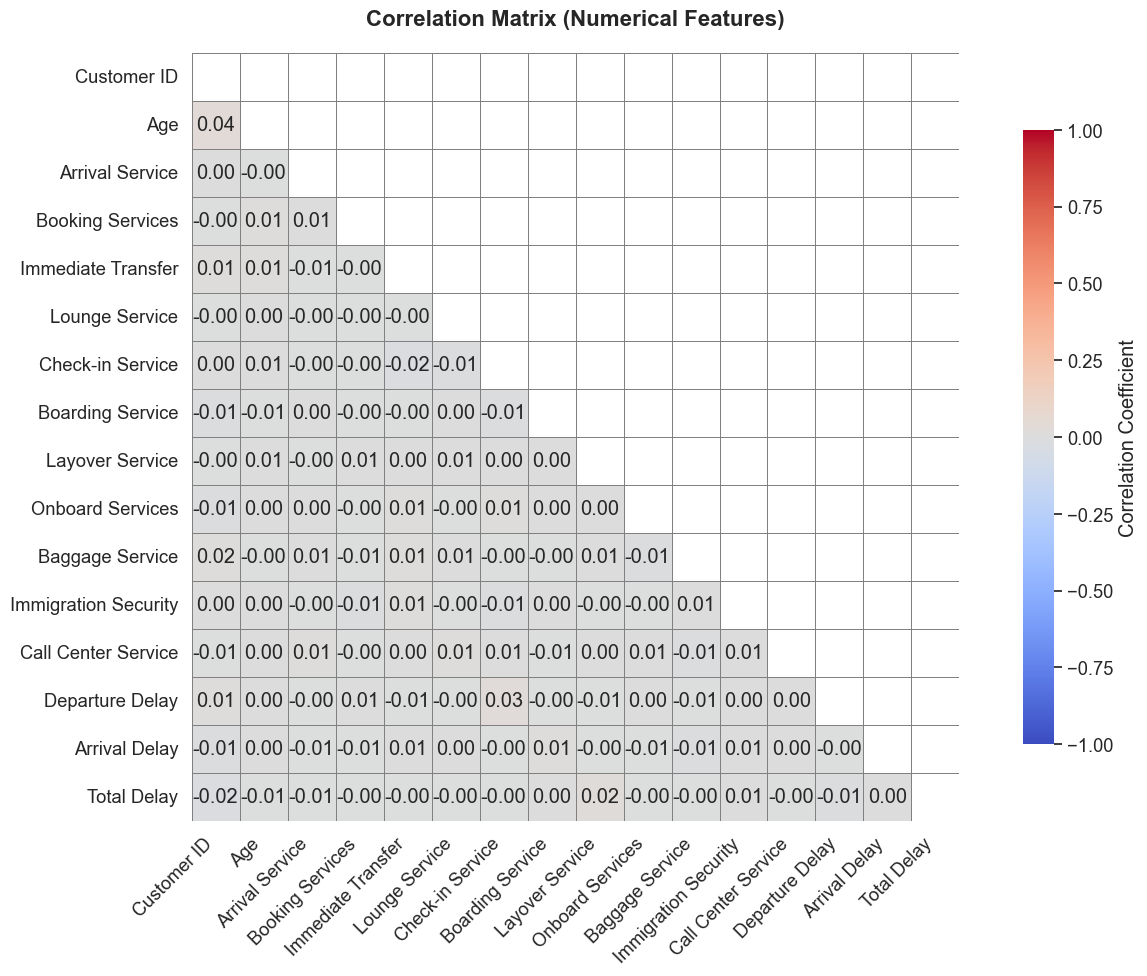

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set aesthetic style
sns.set(style="white", font_scale=1.2)

# Compute correlation matrix
corr = data.corr(numeric_only=True)

# Mask upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": .8, "label": "Correlation Coefficient"},
    vmin=-1, vmax=1,
    ax=ax
)

# Title
ax.set_title("Correlation Matrix (Numerical Features)", fontsize=16, weight='bold', pad=20)

# Rotate and align x-axis labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Step 9: Analyze Target Variable vs Other Features


Satisfaction Distribution by 'Gender':

Satisfaction  DisSatisfied  Satisfied
Gender                               
Female                0.26       0.74
Male                  0.24       0.76


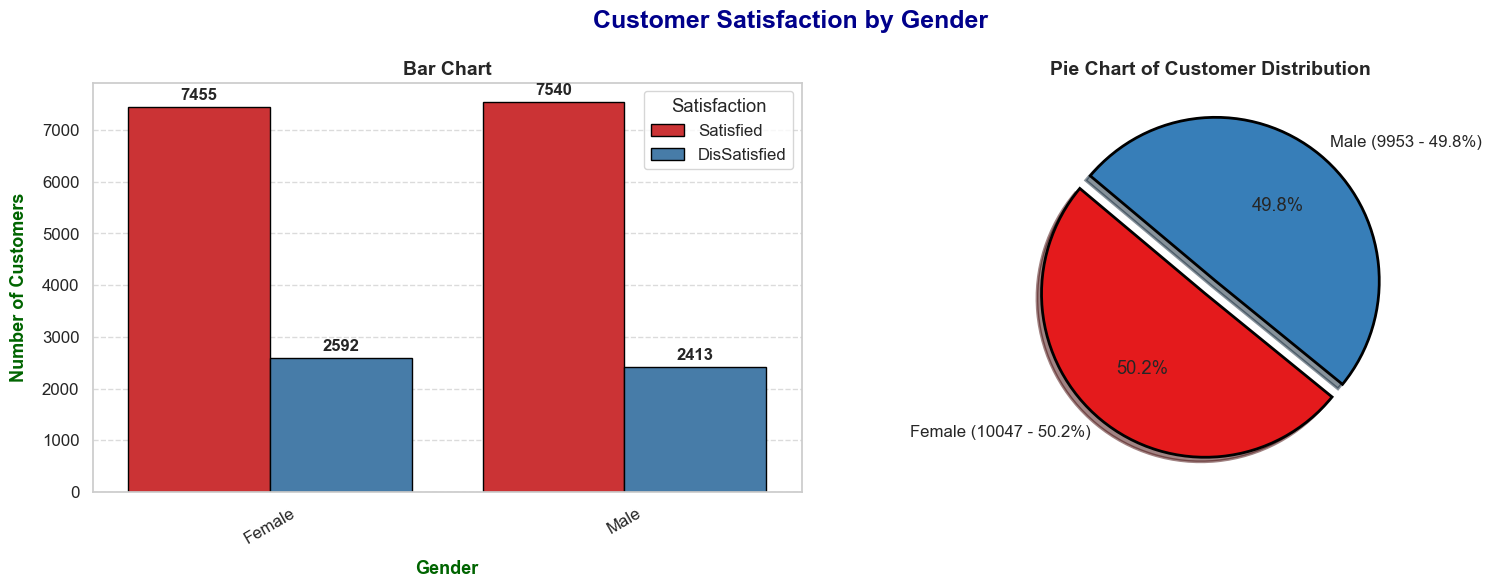


Satisfaction Distribution by 'Customer Type':

Satisfaction       DisSatisfied  Satisfied
Customer Type                             
Loyal Customer             0.22       0.78
disloyal Customer          0.46       0.54


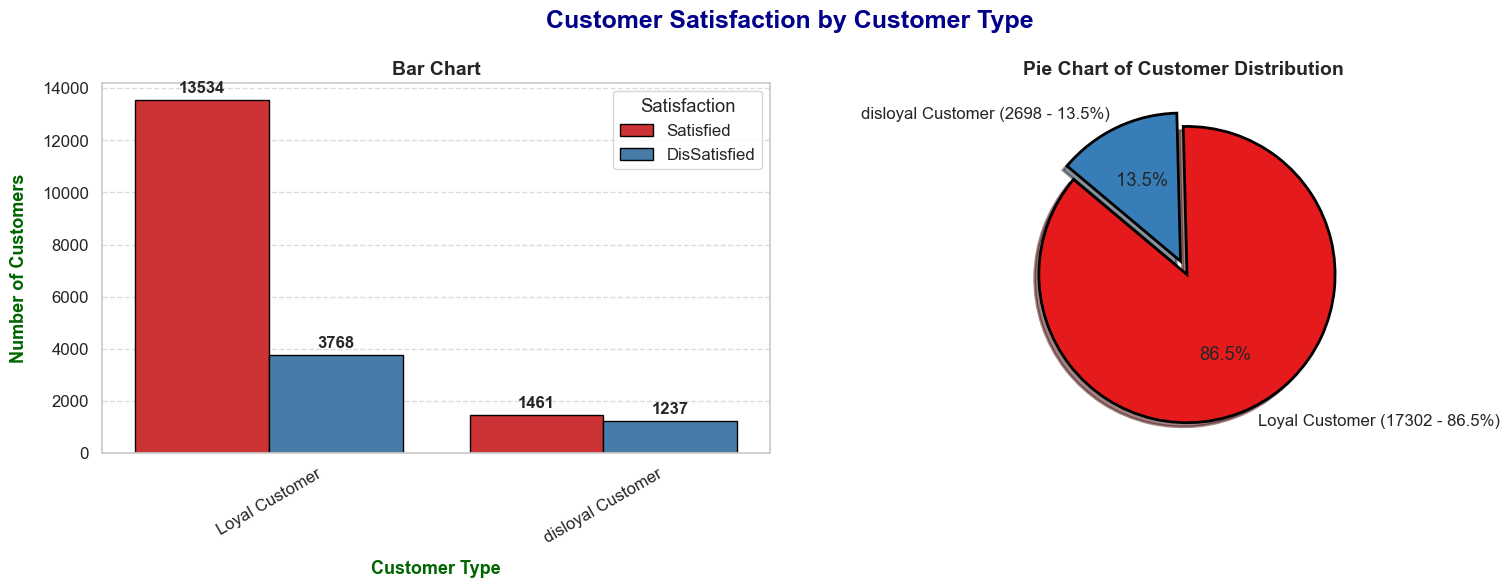


Satisfaction Distribution by 'Type of Travel':

Satisfaction     DisSatisfied  Satisfied
Type of Travel                          
Business travel          0.15       0.85
Personal Travel          0.69       0.31


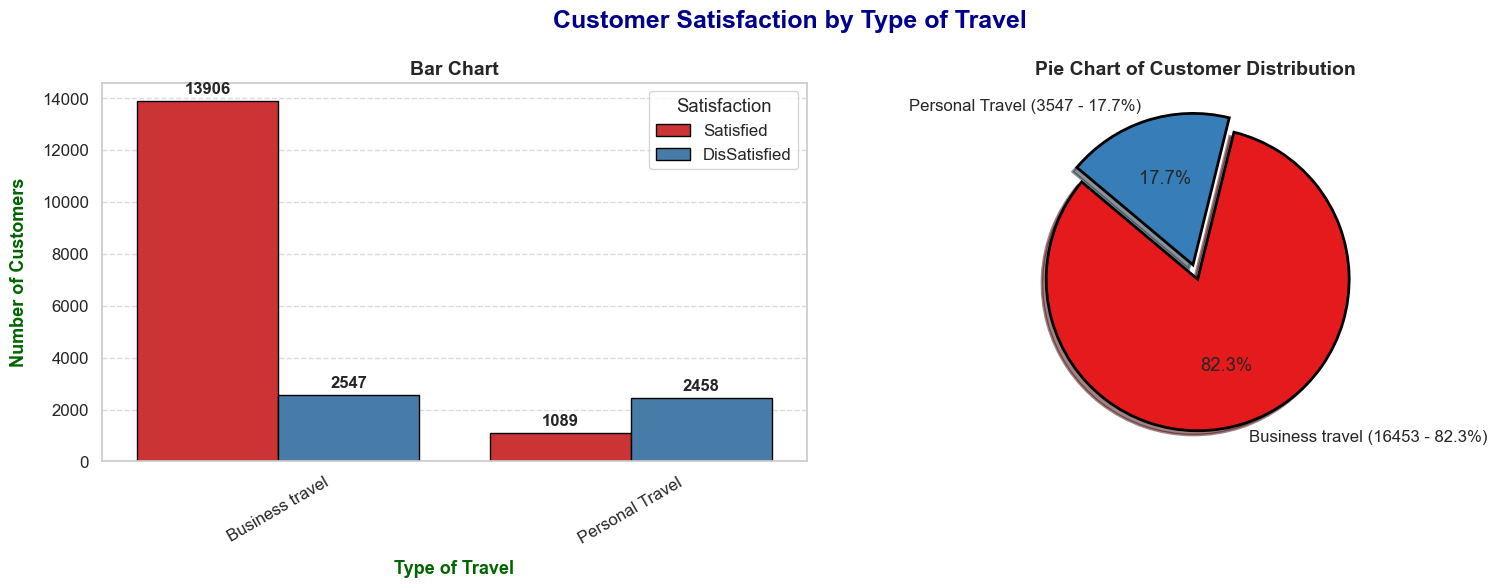


Satisfaction Distribution by 'Class':

Satisfaction  DisSatisfied  Satisfied
Class                                
Business              0.10       0.90
Eco                   0.53       0.47
Leisure               0.45       0.55


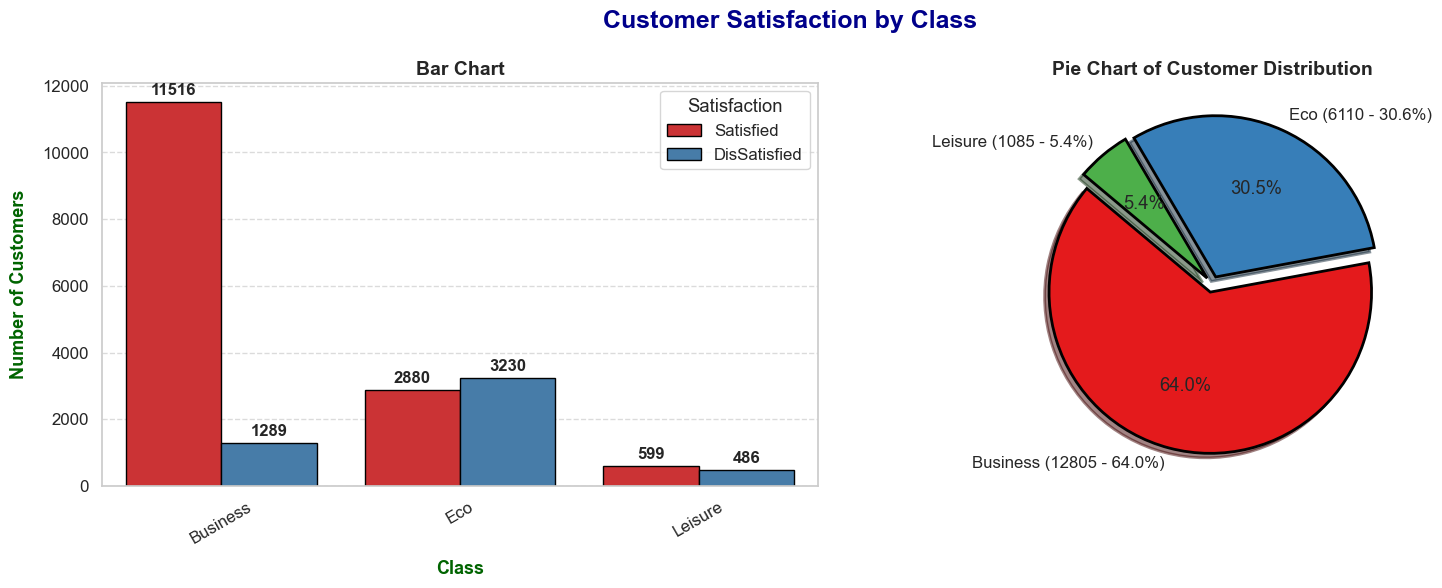

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Categorical columns to analyze
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Loop through each categorical column
for col in cat_cols:
    # Print normalized satisfaction distribution
    print(f"\nSatisfaction Distribution by '{col}':\n")
    print(data.groupby(col)['Satisfaction'].value_counts(normalize=True).unstack().round(2))

    # Get count data for pie chart
    pie_data = data[col].value_counts()
    pie_percent = pie_data / pie_data.sum()

    # Create subplots: bar chart and pie chart
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f"Customer Satisfaction by {col}", fontsize=18, weight='bold', color='darkblue')

    # --- Bar Chart (Countplot) ---
    bar_ax = sns.countplot(
        data=data,
        x=col,
        hue='Satisfaction',
        palette='Set1',
        edgecolor='black',
        ax=axs[0]
    )

    # Add labels on bars (count on top of bars)
    for container in bar_ax.containers:
        bar_ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3,fontweight='bold')

    # Style bar chart
    axs[0].set_title("Bar Chart", fontsize=14, weight='bold')
    axs[0].set_xlabel(col, fontsize=13, labelpad=10, weight='bold', color='darkgreen')
    axs[0].set_ylabel("Number of Customers", fontsize=13, labelpad=10, weight='bold', color='darkgreen')
    axs[0].tick_params(axis='x', rotation=30)
    axs[0].grid(axis='y', linestyle='--', alpha=0.7)
    axs[0].legend(title='Satisfaction', loc='upper right', frameon=True)

    # --- Pie Chart ---
    # Create labels with both count and percentage
    pie_labels = [f"{label} ({count} - {percent*100:.1f}%)" for label, count, percent in zip(pie_percent.index, pie_data, pie_percent)]
    
    # Create pie chart
    axs[1].pie(
        pie_percent,
        labels=pie_labels,
        autopct='%1.1f%%',  # Display percentage
        shadow=True,
        startangle=140,
        colors=sns.color_palette('Set1', n_colors=len(pie_percent)),  # Matching the palette to bar chart
        explode=[0.05]*len(pie_percent),  # Explode all segments slightly
        wedgeprops={'edgecolor': 'black', 'linewidth': 2}
    )
    axs[1].set_title("Pie Chart of Customer Distribution", fontsize=14, weight='bold')

    # Layout adjustment
    plt.tight_layout()
    plt.show()

#### Step 10: Target Variable – Satisfaction


Satisfaction Value Counts (Proportion):

Satisfaction
Satisfied       0.75
DisSatisfied    0.25
Name: count, dtype: float64


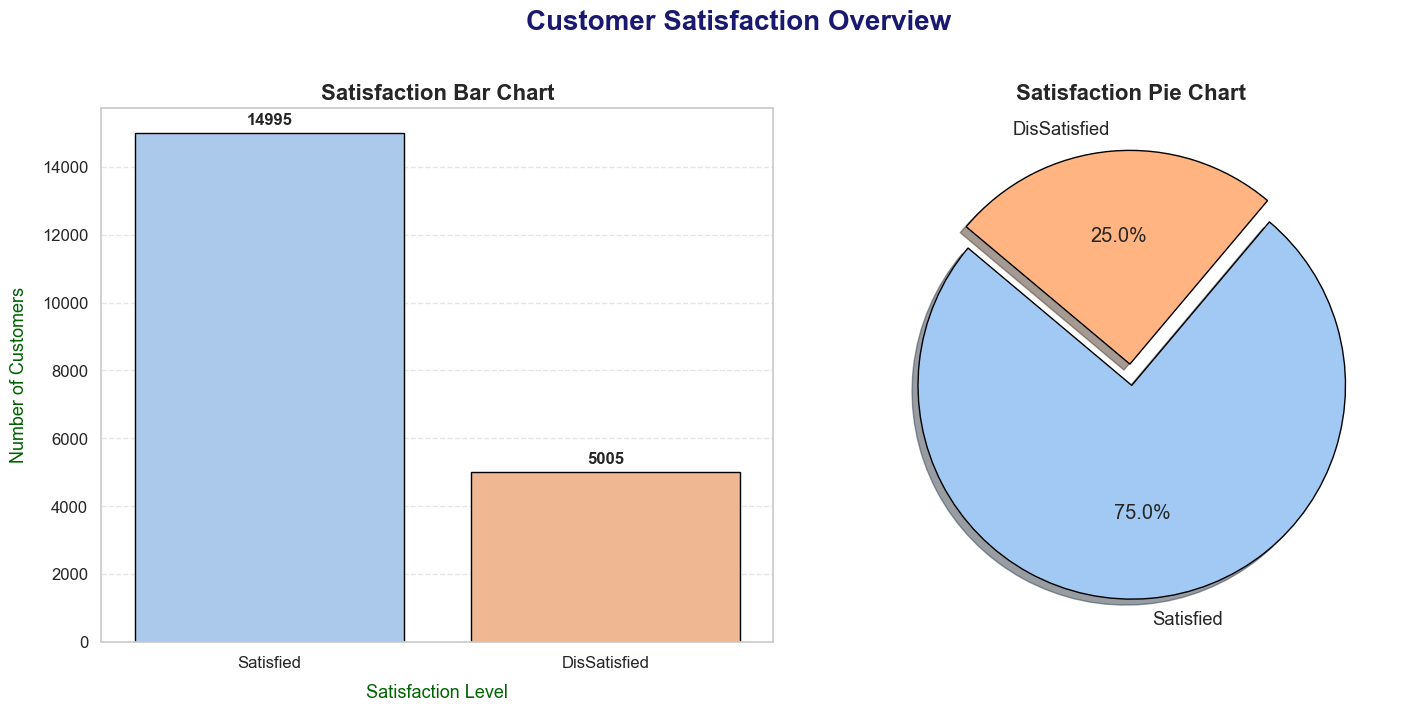

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set Seaborn style
sns.set(style="whitegrid", font_scale=1.2)

# Compute value counts and proportions
satisfaction_counts = data['Satisfaction'].value_counts()
satisfaction_percent = satisfaction_counts / satisfaction_counts.sum()

# Show in console
print("\nSatisfaction Value Counts (Proportion):\n")
print(satisfaction_percent.round(2))

# Explode configuration for pie chart
explode_values = [0.05] * len(satisfaction_percent)  # Slightly separate slices

# Use only the number of colors needed (based on unique values)
needed_colors = sns.color_palette('pastel')[:len(satisfaction_counts)]  # Changed to 'pastel' for a sweeter look

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle("Customer Satisfaction Overview", fontsize=20, weight='bold', color='midnightblue', y=1.02)

# --- Bar Chart ---
barplot = sns.countplot(
    data=data,
    x='Satisfaction',
    palette=needed_colors,
    edgecolor='black',
    ax=axs[0]
)

# Add value labels to bars
for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=4, fontweight='bold')

# Bar chart styling
axs[0].set_title("Satisfaction Bar Chart", fontsize=16, weight='bold')
axs[0].set_xlabel("Satisfaction Level", fontsize=13, labelpad=10, color='darkgreen')
axs[0].set_ylabel("Number of Customers", fontsize=13, labelpad=10, color='darkgreen')
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.5)

# --- Pie Chart ---
axs[1].pie(
    satisfaction_percent,
    labels=satisfaction_percent.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=needed_colors,
    explode=explode_values,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
axs[1].set_title("Satisfaction Pie Chart", fontsize=16, weight='bold')

# Layout adjustment
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

In [36]:
data.columns.to_list()

['Customer ID',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Arrival Service',
 'Booking Services',
 'Immediate Transfer',
 'Lounge Service',
 'Check-in Service',
 'Boarding Service',
 'Layover Service',
 'Onboard Services',
 'Baggage Service',
 'Immigration Security',
 'Call Center Service',
 'Departure Delay',
 'Arrival Delay',
 'Total Delay',
 'Satisfaction']